In [1]:
# ---------------------------------------------------------------------
# 모델링 관련 모듈 로딩
# ---------------------------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchinfo import summary

from torchmetrics.regression import R2Score, MeanSquaredError
from torchmetrics.classification import MulticlassF1Score
from torchmetrics.classification import MulticlassConfusionMatrix
import torch.optim.lr_scheduler as lr_scheduler

import torchvision.models as models

# ---------------------------------------------------------------------
# 데이터 분석 관련 모듈 로딩
# ---------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 이미지 관련 모듈 로딩
# ---------------------------------------------------------------------
import cv2
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import v2
from torchvision import datasets

# ---------------------------------------------------------------------
# 기타 모듈 로딩
# ---------------------------------------------------------------------
import time
import os

# 활용 패키지 버전 체크
print(f'torch Ver.:{torch.__version__}')
print(f'pandas Ver.:{pd.__version__}')
print(f'numpy Ver.:{np.__version__}')

torch Ver.:2.4.1
pandas Ver.:2.0.3
numpy Ver.:1.24.3


In [2]:
# DEVICE 설정
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

- 이미지 파일 => 하나로 합치기 <hr>

In [3]:
## 이미지 파일 => 하나로 합치기
## 데이터 관련 설정
IMG_PATH = r'./data_class_4/train_all2/train/'
# IMG_PATH = r'C:\Users\KDP-43\Desktop\project_OpenCV\data_all\train'

- Tensor ==> Ndarray <hr>

In [4]:
## 데이터 변형 및 전처리
# transConvert = v2.Compose([
#     v2.Resize([180, 180]),
#     v2.RandomResizedCrop(120),
#     v2.ToTensor(),
#     v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     v2.ToDtype(torch.float32, scale=True)
# ])

transConvert = {
    'Train': v2.Compose([
    v2.Resize([256, 256]),
    v2.RandomResizedCrop(224),
    v2.RandomVerticalFlip(p=0.7),
    v2.RandomHorizontalFlip(p=0.7),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.ToDtype(torch.float32, scale=True)
]),
    'Test': v2.Compose([
    v2.Resize([256, 256]),
    v2.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    v2.ToDtype(torch.float32, scale=True)
]),

    'Plain': v2.Compose([
    v2.Resize([180, 180]),
    v2.ToTensor(),
    v2.ToDtype(torch.float32, scale=True)
])


}

c:\Users\KDP-43\anaconda3\envs\CV_torch_38\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [5]:

model = torch.load(r"C:\Users\KDP-43\Desktop\Emoticon_CF_CUDA\model_num_loss(0.1119)_score(0.9434).pth",
				   map_location=torch.device('cpu'))

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_19580\907096299.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(r"C:\Users\KDP-43\Desktop\Emoticon_CF_CUD

#### 테스트

#### 여러개 이미지 그리기 & 예측 라벨 그림 그리기

1200
{0: 'shani', 1: 'shuya', 2: 'toshim'}
tensor([2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1])


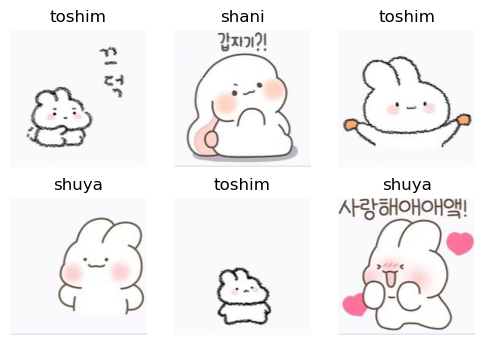

In [6]:
# test_path = r"C:\Users\KDP-43\Desktop\project_OpenCV\data_class_4\train_all2\test"
test_path = r"C:\Users\KDP-43\Desktop\project_OpenCV\data_all\test"

test_dataset = ImageFolder(test_path, transform=transConvert['Plain'])

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 12,
    num_workers=2,
    shuffle=True
)

print(len(test_dataset))

samples, labels = iter(test_loader).__next__()
classes = dict(zip(range(len(test_dataset.classes)), test_dataset.classes))
print(classes)

print(labels)

fig = plt.figure(figsize=(6,4))

# img_clip = np.clip(img,0,1)

for i in range(6):
    a = fig.add_subplot(2,3, i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    tmp = np.transpose(samples[i].numpy(), (1,2,0))
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
    
# plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)

1200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


classes
{0: 'shani', 1: 'shuya', 2: 'toshim'}
tensor([0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1])


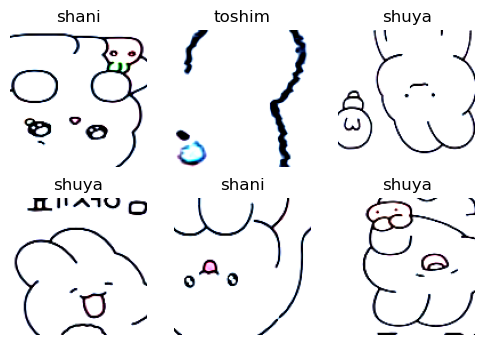

In [7]:
test_path = r"C:\Users\KDP-43\Desktop\project_OpenCV\data_all\test"
test_dataset = ImageFolder(test_path, transform=transConvert['Train'])

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size = 12,
    num_workers=2,
    shuffle=True
)

print(len(test_dataset))

samples, labels = iter(test_loader).__next__()
classes = dict(zip(range(len(test_dataset.classes)), test_dataset.classes))

print("classes")
print(classes)

print(labels)

fig = plt.figure(figsize=(6,4))

# img_clip = np.clip(img,0,1)

for i in range(6):
    a = fig.add_subplot(2,3, i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    tmp = np.transpose(samples[i].numpy(), (1,2,0))
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))

In [8]:
def im_convert(tensor):
	image = tensor.clone().detach().numpy()

	image = image.transpose(1,2,0)
	image = image*(np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)))

	image = image.clip(0,1)

	return image

C:\Users\KDP-43\AppData\Local\Temp\ipykernel_19580\4270726462.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(r"C:\Users\KDP-43\Desktop\Emoticon_CF_CU

shani


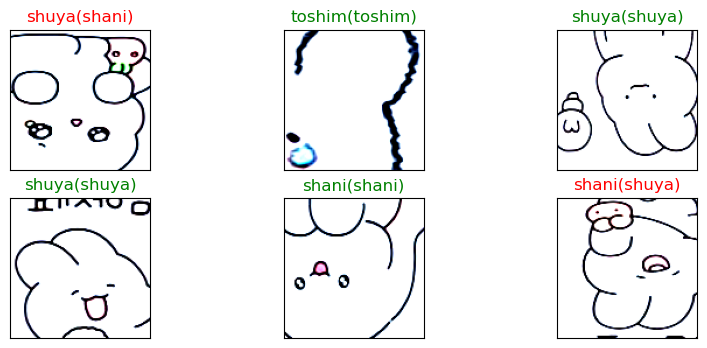

In [9]:

model = torch.load(r"C:\Users\KDP-43\Desktop\Emoticon_CF_CUDA\model_num_loss(0.1119)_score(0.9434).pth",
				   map_location=torch.device('cpu'))

output = model(samples)
_, preds = torch.max(output,1)

fig = plt.figure(figsize=(10,4))

for idx in range(6):
	ax = fig.add_subplot(2,3, idx+1, xticks=[], yticks=[])

	plt.imshow(im_convert(samples[idx]))
	a.set_title(classes[labels[i].item()])
	ax.set_title("{}({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])),
                             color=("green" if preds[idx]==labels[idx] else "red"))

print(str(classes[preds[idx].item()]))
    


plt.show()

